## Classification
1. Feature processing: scaling, selection
2. Classify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

plt.style.use('ggplot')
%matplotlib inline

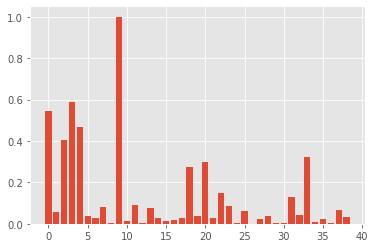

In [112]:
# 2. feature processing
import scipy.stats as stats
from joblib import dump, load
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df_train = pd.read_csv("data/train.csv", index_col=0).to_numpy()
df_valid = pd.read_csv("data/valid.csv", index_col=0).to_numpy()
X_train, y_train = df_train[:, :-1], df_train[:, -1]
X_valid, y_valid = df_valid[:, :-1], df_valid[:, -1]
y_train = ["red" if y == 0 else "green" for y in y_train]

# # numerical_features = list(range(8))
# numerical_features = list(range(8))+list(range(20, 24))
# # numerical_features = list(range(len(X_train[0])))
# preprocess_std = ColumnTransformer(
#                             transformers = [('stand', StandardScaler(), numerical_features)], 
#                             remainder="passthrough"
#                             )

# preprocess_minmax = ColumnTransformer(
#                             transformers = [('minmax', MinMaxScaler(), numerical_features)], 
#                             remainder="passthrough"
#                             )

# preprocess_maxabs = ColumnTransformer(
#                             transformers = [('maxabs', MaxAbsScaler(), numerical_features)], 
#                             remainder="passthrough"
#                             )

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, chi2
# selector = SelectKBest(f_classif, k=15)
selector = SelectKBest(chi2, k=10)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(range(df_train.shape[-1]-1), scores)

# all 39 features
X = StandardScaler().fit_transform(X_train)

# top 15 features
X_train = X_train[:, selector.get_support()]
X_half = StandardScaler().fit_transform(X_train)

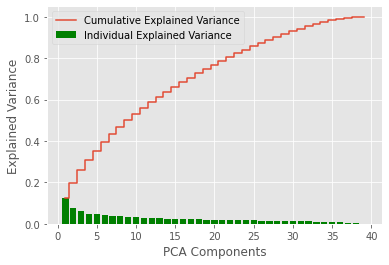

In [113]:
pca = PCA()
pca.fit(X)
plt.step(range(1, X.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, 
        color='g', label='Individual Explained Variance')
plt.ylabel('Explained Variance')
plt.xlabel('PCA Components')
plt.legend()

Text(0.5, 0.98, 'PCA on all 39 features (left) and on top 10 features found by chi2 (right)')

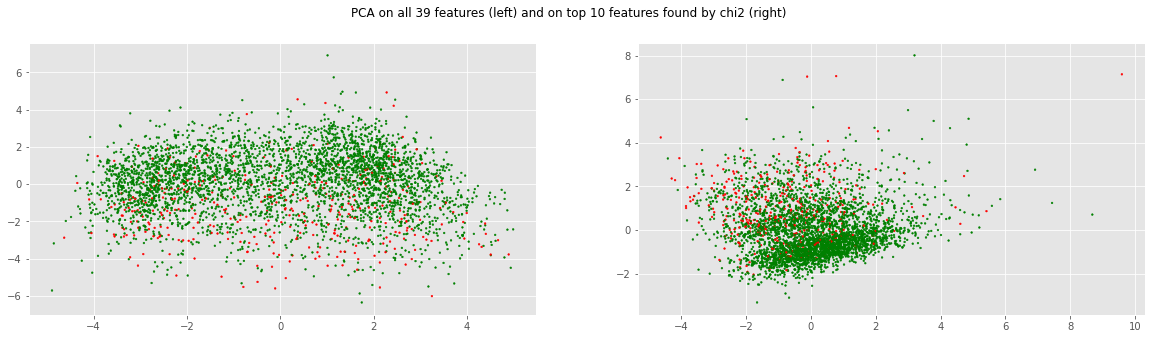

In [114]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot2grid(fig_dims, (0, 0))
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=3, c=y_train)

plt.subplot2grid(fig_dims, (0, 1))
X_pca = PCA(n_components=2).fit_transform(X_half)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=3, c=y_train)
plt.suptitle("PCA on all 39 features (left) and top 10 features found by chi2 (right)")

# # visualize 3D plot
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(7,5))
# ax = fig.add_subplot(111, projection='3d')
# fig.patch.set_facecolor('white')
# ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=3, c=y_train)

Text(0.5, 0.98, 'T-SNE on all 39 features (left) and on top 10 features found by chi2 (right)')

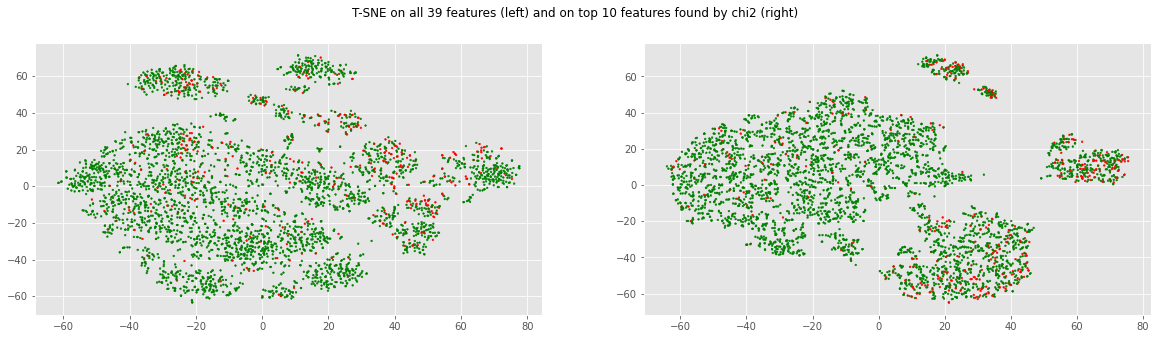

In [115]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot2grid(fig_dims, (0, 0))
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=3, c=y_train)

plt.subplot2grid(fig_dims, (0, 1))
X_embedded = TSNE(n_components=2).fit_transform(X_half)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=3, c=y_train)
plt.suptitle("T-SNE on all 39 features (left) and top 10 features found by chi2 (right)")